In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid', font_scale = 1.8)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
resp = pd.read_csv('ens_e_aval_agosto_2021_respostas.csv')
perg = pd.read_excel('ens_e_aval_agosto_2021_perguntas.xlsx')

# Retirando resposta de teste e coluna com emails dos alunos 
resp.drop([0], inplace=True)
resp.drop(['Endereço de e-mail'], axis = 1, inplace=True)
resp_num = resp.copy()
resp_num.columns = range(len(resp.columns))

# Limpeza dos dados
resp_num[2] = resp_num[2].map({'1°':1,'2°':2,'3°':3,'4°':4,'5°':5,'6°':6,'7°':7,'8°':8,'9°':9,'10°':10})

resp_num[0] = pd.to_datetime(resp_num[0])
resp_num[1] = pd.to_numeric(resp_num[1])

for coluna in resp_num.columns:
    if resp_num[coluna].dtype == object and resp_num[coluna].isnull().sum() == 0:
        resp_num[coluna] = resp_num[coluna].map({'Não':0,'Sim':1})

#Função para criar grupos a partir dos períodos em q cada aluno se encontra
def agrupa_alunos(row):
    val = 'Veteranos'
    if row == 1 or row ==2 or row == 3:
        val = 'Calouros'
    elif row == 8 or row ==9 or row ==10:
        val = 'Formandos'
    return val

#Aplicando função na coluna dos períodos e criando nova coluna 
resp_num[20] = resp_num.iloc[:,2].apply(agrupa_alunos)
resp.head()

,Carimbo de data/hora,Em qual ano você entrou na ELT?,A maioria das matérias que você está cursando pertencem a qual período?,As orientações dos professores te direcionam precisamente a estudar o que será avaliado?,Gostaria de ter avaliações mais frequentes?,Comentários pertinentes a esse contexto:,"Em geral, os experimentos práticos em laboratório facilitam a sua compreensão dos conteúdos teóricos?","Há estímulo ou motivação suficiente da metodologia de ensino, ou dos professores, para ""tentar enxergar"" a teoria nas práticas?","Você é capaz de abstrair, na maioria das práticas, os fenômenos teóricos estudados?",Comentários pertinentes a esse contexto:.1,A quantidade de momentos síncronos te satisfaz?,"Você gostaria de ter mais exemplos, a nível de prova, resolvidos pelos professores?",A quantidade de listas de exercícios te satisfaz?,"Nas aulas destinadas a dúvidas, elas são sanadas?",Gostaria de comentar o motivo?,"Até o quarto período do curso, você sente que teve um direcionamento satisfatório para as possíveis carreiras na Eng. Elétrica?","Em relação a esse direcionamento dado pelo departamento, quanto ele te motiva?",Quanto às avaliações:,Gostaria que existissem projetos práticos?,Comentários pertinentes a esse contexto:.2
1,30/08/2021 21:03:35,2020,3°,Sim,Não,NaN,Não,Não,Não,NaN,Sim,Sim,Sim,Não,NaN,Não,2,1.0,10.0,NaN
2,30/08/2021 21:04:15,2017,7°,Sim,Não,NaN,Sim,Não,Sim,NaN,Sim,Não,Não,Sim,NaN,Não,1,3.0,9.0,NaN
3,30/08/2021 21:08:02,2021,1°,Sim,Sim,NaN,Sim,Sim,Não,NaN,Não,Sim,Não,Sim,NaN,Não,4,8.0,9.0,NaN
4,30/08/2021 21:08:34,2018,5°,Não,Sim,NaN,Sim,Não,Não,NaN,Não,Sim,Não,Sim,NaN,Não,2,10.0,10.0,NaN
5,30/08/2021 21:09:11,2018,9°,Não,Sim,NaN,Sim,Não,Sim,NaN,Não,Sim,Não,Não,Estou cursando duas disciplinas quem nem seque...,Não,1,7.0,9.0,NaN


In [3]:
resp_num.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,2021-08-30 21:03:35,2020,3,1,0,NaN,0,0,0,NaN,...,1,1,0,NaN,0,2,1.0,10.0,NaN,Calouros
2,2021-08-30 21:04:15,2017,7,1,0,NaN,1,0,1,NaN,...,0,0,1,NaN,0,1,3.0,9.0,NaN,Veteranos
3,2021-08-30 21:08:02,2021,1,1,1,NaN,1,1,0,NaN,...,1,0,1,NaN,0,4,8.0,9.0,NaN,Calouros
4,2021-08-30 21:08:34,2018,5,0,1,NaN,1,0,0,NaN,...,1,0,1,NaN,0,2,10.0,10.0,NaN,Veteranos
5,2021-08-30 21:09:11,2018,9,0,1,NaN,1,0,1,NaN,...,1,0,0,Estou cursando duas disciplinas quem nem seque...,0,1,7.0,9.0,NaN,Formandos


In [48]:
# Função para gráfico de agrupamento
def bar_agrupado(coluna, valor, cor, legenda, alpha = 0.8):
    
    total = resp_num.groupby(by=20, as_index=False).count()
    total = total.reindex(index = [0,2,1])
    total = total.set_index(pd.Index([0,1,2]))
    frente = resp_num.loc[resp_num[coluna]==valor].groupby(by=20,as_index=False).count()
    frente = frente.reindex(index = [0,2,1])
    frente = frente.set_index(pd.Index([0,1,2]))

    sns.barplot(data = total, x=20, y=3, color = 'deepskyblue', alpha = 0.5,
                label = 'Total de Respostas',
                order=['Calouros', 'Veteranos', 'Formandos'])
    sns.barplot(data = frente,x=20, y=3, color = cor, alpha = alpha,
                label = legenda,
                order=['Calouros', 'Veteranos', 'Formandos'])
                
    for i in range(len(total)):   
        plt.text(i, total.loc[i,3], total.loc[i,3], ha='center', va='bottom', fontsize = 18)
    for i in range(len(frente)):   
        plt.text(i, frente.loc[i,3], '{:.2f}%'.format((frente.loc[i,3]/total.loc[i,3])*100), ha='center', va='bottom', fontsize = 18)

    plt.legend(fontsize = 18)
    plt.xlabel('')
    plt.ylabel('Quantidade de respostas', fontsize = 18)
    plt.title(resp.columns[coluna], fontsize = 20);

In [53]:
#Função para gráfico de pizza
def pizza (coluna):
    sizes = [resp_num.loc[resp_num[coluna] == 1, coluna].count(), resp_num.loc[resp_num[coluna] == 0, coluna].count()]
    plt.pie(sizes,autopct='%1.1f%%', labels=['Sim', 'Não'], explode = (0.1,0), shadow=True, colors=['deepskyblue', 'orangered']);
    plt.title(resp.columns[coluna], fontsize = 18);

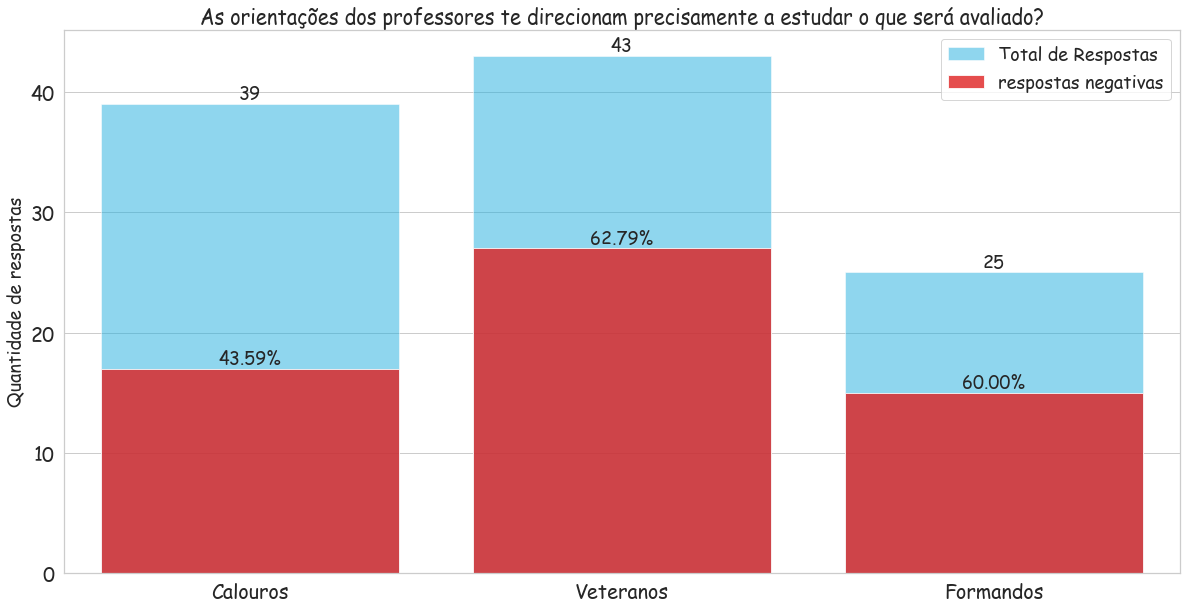

In [49]:
# Grafico de orientação para avaliações (coluna 3)
bar_agrupado(3, 0, 'red', 'respostas negativas', alpha=0.8)

# 2 - Como alunos se sentem
- [x] Demanda por orientação de carreira - google
- [x] Demanda por projetos práticos - google

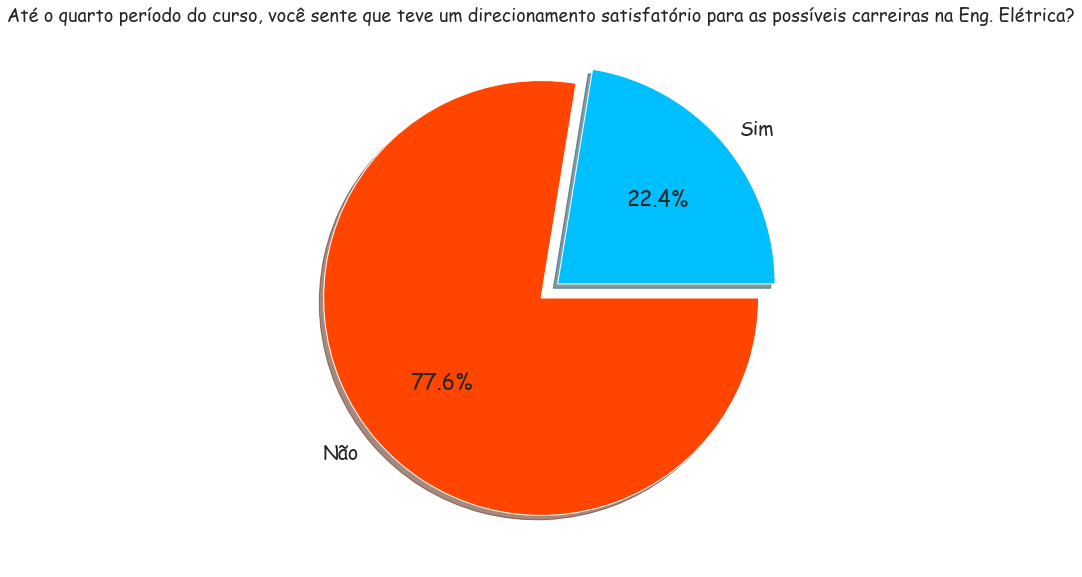

In [54]:
# 2.1 - demanda por orientação de carreira (coluna 15)
pizza(15)

Text(0.5, 0, 'notas dos alunos')

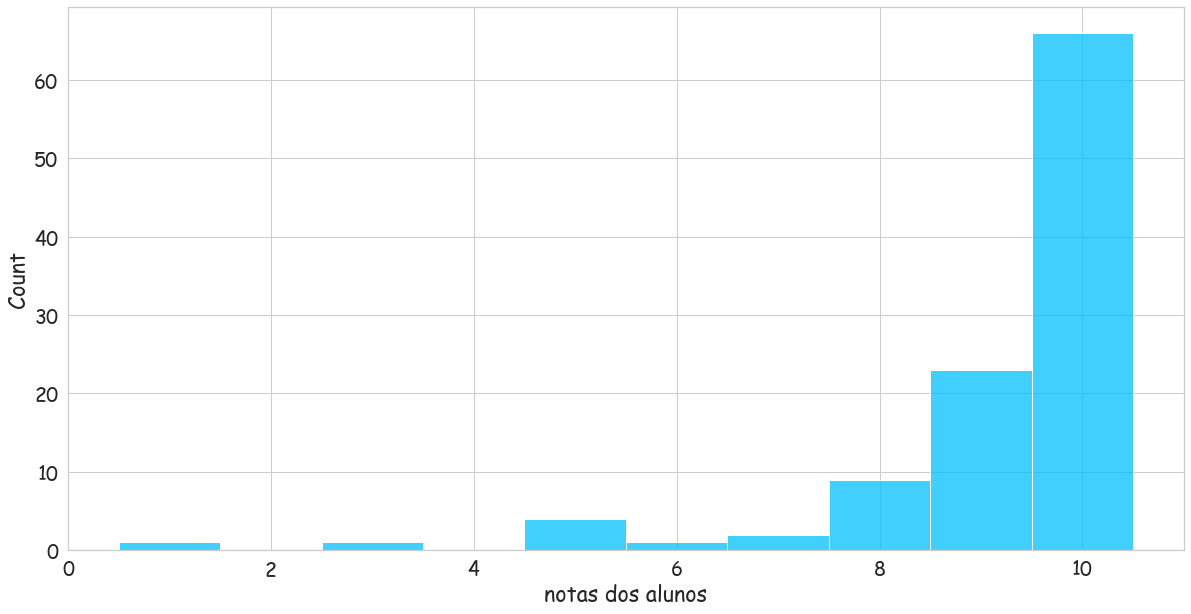

In [56]:
# 2.2 - grafico de demanda projetos praticos (coluna 18)
sns.histplot(resp_num, x  = 18, discrete = True, color = 'deepskyblue');
plt.xlabel('notas dos alunos')

# 3 - Mudanças na teoria
- [] Frequência de avaliação - agrupados
- [] Exemplos a nível de prova - agrupados

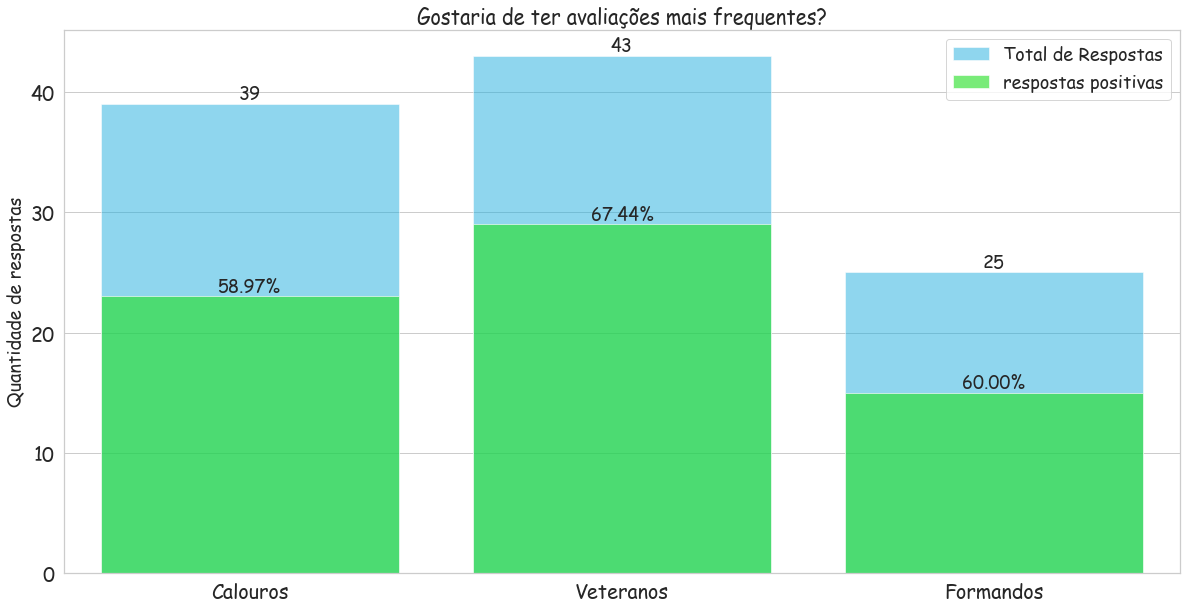

In [55]:
bar_agrupado(4, 1, 'lime', 'respostas positivas', alpha=0.6)

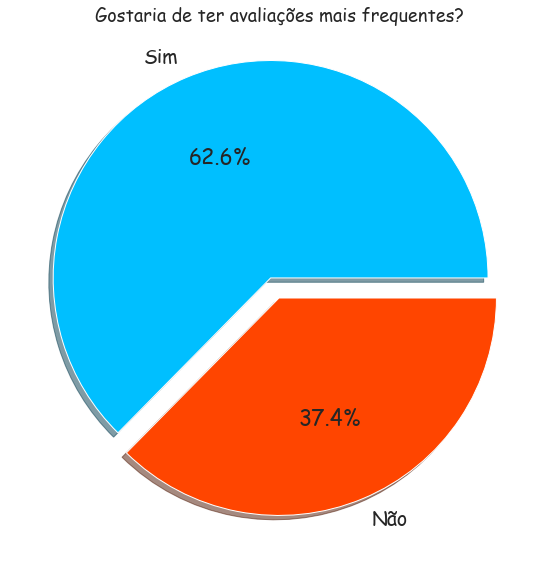

In [57]:
pizza(4)